<a href="https://colab.research.google.com/github/galrat/parsing/blob/main/Copy_of_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
!pip install xlsxwriter
!pip install -U kaleido
!pip install openpyxl


In [223]:
import pandas as pd
from openpyxl import load_workbook
import math
import plotly.express as px
import matplotlib.pyplot as plt
import openpyxl

In [224]:
company_name = 'Parrot'
paths = ['/content/1-1000 DJI.xlsx', '/content/1001-2000 DJI.xlsx', '/content/2001-2444 DJI.xlsx']
paths = ['/content/1-1000 XAG.xlsx', '/content/1001-1564 XAG.xlsx']
paths = ['/content/1-897 Autel.xlsx']
paths = ['/content/115 Skydio.xlsx']
paths = ['/content/114 Parrot.xlsx']

In [225]:
# Load the workbook

df_original = pd.DataFrame()
for path in paths:
  df_temp = pd.read_excel(path)
  df_original = pd.concat([df_original,df_temp],ignore_index=True)
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 36 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Priority numbers                                           114 non-null    object
 1   Earliest priority number                                   114 non-null    object
 2   Application number                                         114 non-null    object
 3   Publication numbers                                        114 non-null    object
 4   Priority dates                                             114 non-null    object
 5   Title                                                      114 non-null    object
 6   English title                                              114 non-null    object
 7   Abstract                                                   108 non-null    object
 8   English abstract    

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [226]:
df_2 = df_original


In [227]:
# prompt: split each element of all_values by '\n' and add all element into new list

# Assuming df_2['Country code and status'] contains comma-separated values
all_values_split = []
for value in df_2['Application number']:
    if isinstance(value, str):  # Check if the value is a string
      all_values_split.extend(value.split('\n'))

# Remove any empty strings from the list
all_values_split = [x[:2].strip() for x in all_values_split if x.strip()]

In [228]:
geo_df = pd.DataFrame(all_values_split , columns=['country'])
geo_counter = pd.DataFrame([list(geo_df.value_counts().index), geo_df.value_counts().values]).T
geo_counter.columns = ['country_code', 'number']


In [229]:
countries = []
for i in geo_counter['country_code']:
  countries.append(i[0])
geo_counter['country_code'] = countries
geo_counter

,country_code,number
0,FR,99
1,US,95
2,EP,79
3,CN,77
4,JP,49
5,WO,10
6,CA,7
7,TW,7
8,AU,6
9,HK,4


In [230]:
# Create a dictionary to map country codes to Russian country names
country_code_to_russian_name = {
    'US': 'Соединённые Штаты Америки',
    'CN': 'Китай',
    'JP': 'Япония',
    'DE': 'Германия',
    'GB': 'Великобритания',
    'FR': 'Франция',
    'EP': 'Европейский союз',
    'RU': 'Россия',
    'TW': 'Тайвань',
    'HK': 'Гонконг',
    'IN': 'Индия',
    'BR': 'Бразилия',
    'SG': 'Сингапур',
    'IT': 'Италия',
    'CA': 'Канада',
    'KR': 'Южная Корея',
    'AU': 'Австралия',
    'WO': 'Международная заявка',
    'DK': 'Дания',
    'ES': 'Испания',
    'MX': 'Мексика',
    'NO': 'Норвегия',
    'AT': 'Австрия'
    # Add more mappings as needed
}


# Function to get russian country name or return original code if not found
def get_russian_country_name(country_code):
    return country_code_to_russian_name.get(country_code, country_code)


# Amend the 'country_code' column with Russian names
geo_counter['Название страны'] = geo_counter['country_code'].apply(get_russian_country_name)
geo_counter['Количество заявок'] = geo_counter['number']
geo_counter

,country_code,number,Название страны,Количество заявок
0,FR,99,Франция,99
1,US,95,Соединённые Штаты Америки,95
2,EP,79,Европейский союз,79
3,CN,77,Китай,77
4,JP,49,Япония,49
5,WO,10,Международная заявка,10
6,CA,7,Канада,7
7,TW,7,Тайвань,7
8,AU,6,Австралия,6
9,HK,4,Гонконг,4


In [231]:
excel_file_path = '/content/' + company_name + '.xlsx'

writer = pd.ExcelWriter(excel_file_path, engine='xlsxwriter')

# Write the geo_counter DataFrame to the specified sheet
geo_counter.to_excel(writer, sheet_name='geo_countries', index=False)

# Save the Excel file by closing the writer object
writer.close() # Use close() instead of save()

In [232]:
# Create a dictionary to map 2-letter country codes to 3-letter codes
country_code_mapping = {
    'AU': 'AUS', 'US': 'USA', 'CN': 'CHN', 'EP': 'EUR', 'JP': 'JPN', 'KR': 'KOR',
    'CA': 'CAN', 'DE': 'DEU', 'GB': 'GBR', 'FR': 'FRA', 'RU': 'RUS', 'TW': 'TWN',
    'WO': 'WLD', 'HK': 'HKG', 'IN': 'IND', 'BR': 'BRA', 'SG': 'SGP', 'IT': 'ITA',
    'NO': 'NOR', 'ES': 'ESP', 'MX': 'MEX', 'DK': 'DNK', 'AT': 'AUT', 'HU': 'HUN',
    'TH': 'THA', 'PL': 'POL'
    # Add more mappings as needed
}

# Function to convert 2-letter to 3-letter codes
def convert_country_code(code):
    return country_code_mapping.get(code, code)  # Return original if not found

# Apply the conversion to the 'country code' column
geo_counter['country_code'] = geo_counter['country_code'].apply(convert_country_code)
geo_counter

,country_code,number,Название страны,Количество заявок
0,FRA,99,Франция,99
1,USA,95,Соединённые Штаты Америки,95
2,EUR,79,Европейский союз,79
3,CHN,77,Китай,77
4,JPN,49,Япония,49
5,WLD,10,Международная заявка,10
6,CAN,7,Канада,7
7,TWN,7,Тайвань,7
8,AUS,6,Австралия,6
9,HKG,4,Гонконг,4


In [233]:
geo_counter_2 = geo_counter.copy() # Create a copy to avoid modifying the original DataFrame

# Calculate the square root of 'number' and handle potential errors
geo_counter_2['sqrt_number'] = geo_counter_2['number'].apply(lambda x: math.sqrt(x) if isinstance(x, (int, float)) and x >= 0 else None)



In [234]:
geo_counter_2 = pd.DataFrame()
# Normalize 'number' column to a maximum of 500
geo_counter_2['country_code'] = geo_counter['country_code']
geo_counter_2['number'] = geo_counter['number'].astype(int)

geo_counter_2['number'] = (geo_counter['number'] / geo_counter['number'].max()) * 500
geo_counter_2['number'] = geo_counter_2['number'].apply(lambda x: math.sqrt(x) if isinstance(x, (int, float)) and x >= 0 else None)
geo_counter_2

,country_code,number
0,FRA,22.360680
1,USA,21.904291
2,EUR,19.974732
3,CHN,19.720266
4,JPN,15.731330
5,WLD,7.106691
6,CAN,5.945884
7,TWN,5.945884
8,AUS,5.504819
9,HKG,4.494666


In [235]:
df = geo_counter_2

# Create an interactive choropleth map
fig = px.choropleth(
    df,
    locations='country_code',       # Country codes column
    color='number',                 # Data values for coloring
    hover_name='country_code',      # Hover text (country codes)
    color_continuous_scale='OrRd',  # Color scheme (many options)
    locationmode='ISO-3',           # Country codes type (ISO-3)
    title="World Map with Numeric Values"
)

# Maximum tuning for customization
fig.update_geos(
    visible=True,                  # Show map features
    resolution=50,                 # Map resolution
    showcountries=True,            # Display country borders
    countrycolor="Black",          # Border color
    showcoastlines=True,           # Display coastlines
    coastlinecolor="DarkBlue",     # Coastline color
    showland=True,                 # Highlight land areas
    landcolor="LightGray",         # Land color
    showocean=True,                # Display ocean
    oceancolor="LightBlue",        # Ocean color
    showlakes=True,                # Highlight lakes
    lakecolor="Blue",              # Lake color
    projection_type="natural earth"  # Projection type (e.g., 'orthographic', 'mercator')
)

# Fine-tune layout options
fig.update_layout(
    title={
        'text': "География подачи заявок",
        'y': 0.95,  # Title position
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    coloraxis_colorbar=dict(
        title="Количество заявок",            # Legend title
        tickvals=[100, 200, 300, 400, 500],  # Define specific ticks
        ticktext=["Мало", "Средне", "Много", "Очень много", "Максимум"],  # Custom tick labels
        len=0.5,                  # Length of color bar
        thickness=15,             # Width of color bar
    ),
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Remove white space around map
    geo=dict(bgcolor="lightyellow"),           # Map background color
)

# Add interactivity
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Value: %{z}',  # Customize hover info
    marker_line_width=0.5,  # Borders around areas
    marker_line_color="black"
)

fig.show()
fig.write_image(company_name + "_world_map.svg", format="svg")

# динамика патентования

In [236]:
priority_dates = []
for i in df_original['Priority dates']:
  priority_dates.append(int(i.split('/n')[0][:4]))
len(priority_dates), len(df_original)


(114, 114)

In [237]:
df_original['Priority dates_2'] = priority_dates

In [238]:
year_counts = df_original['Priority dates_2'].value_counts().sort_index()
years_all = list(range(min(priority_dates), max(priority_dates)+1))

year_counts = year_counts.rename_axis('Год').rename('Количество заявок')
year_counts = year_counts.reindex(years_all, fill_value=0)
year_counts

,Количество заявок
Год,
2007,1
2008,3
2009,4
2010,5
2011,3
2012,4
2013,2
2014,11
2015,20


In [239]:
# Save the workbook to a new file
excel_file_path = ('/content/'+ company_name +'.xlsx')
print(excel_file_path)
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    year_counts.to_excel(writer, sheet_name='filing_dynamic')

/content/Parrot.xlsx


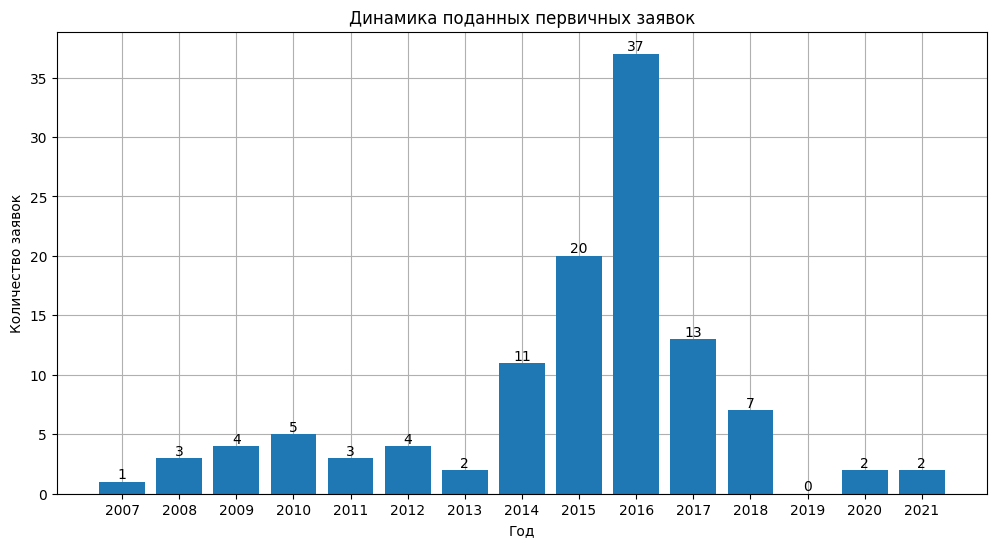

In [240]:

years_all = list(range(year_counts.index.min(), year_counts.index.max()+1))

# Count the number of applications filed in each year
applications_per_year = year_counts.sort_index()
applications_per_year.index = applications_per_year.index.astype(int)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(applications_per_year.index, applications_per_year.values)
plt.xlabel('Год')
plt.ylabel('Количество заявок')
plt.title('Динамика поданных первичных заявок')
plt.xticks(years_all)
plt.grid(True)
plt.gca().set_axisbelow(True)
# Add value labels on top of each bar
if applications_per_year.values.max() < 50:
  shift_value = 0
else:
  shift_value = 1
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + shift_value, yval, ha='center', va='bottom') # Adjust 1 for vertical spacing
plt.savefig(company_name + "_filing_dynamics.svg", format="svg")


plt.show()


In [241]:
other_assignies_1 = df_original['Current assignees'].str.split('\n').explode().value_counts()


In [242]:
for i in other_assignies_1.index:
  test_name = i
  the_applicant_data = df_original[df_original['Current assignees'].str.contains(test_name, case=False)]['Current assignees']

  print(i, len(the_applicant_data))


PARROT DRONES 111
PARROT 114
ETABLISSEMENTS PIERRE PARROT 2
PARLO FRANCE F 75010 PARIS CAY DE GEMMAPE 174 1
INNOVAPLANT ZIERPFLANZEN 1
PARROTT 1
MAD REACH 1
PARROT UNE SOCIÉTÉ DE DROIT FRANÇAIS 1


In [243]:
# prompt: save i, len(the_applicant_data) into excel file

# Create a list to store the data
data_to_save = []

for i in other_assignies_1.index:
  test_name = i
  the_applicant_data = df_original[df_original['Current assignees'].str.contains(test_name, case=False)]['Current assignees']
  data_to_save.append([i, len(the_applicant_data)])

# Create a DataFrame from the list
df_to_save = pd.DataFrame(data_to_save, columns=['Компания', 'Количество заявок'])

# Save the DataFrame to an Excel file
excel_file_path = '/content/' + company_name + '_additional_assignee_counts.xlsx'
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='w') as writer:
    df_to_save.to_excel(writer, sheet_name='AssigneeCounts', index=False)

In [244]:
other_assignees_2 = df_original['Parent company'].str.split('\n').explode().value_counts()


In [245]:
others = pd.concat([other_assignies_1, other_assignees_2]).groupby(level=0).sum()
others.sort_values(ascending=False, inplace=True)
others

,count
ETABLISSEMENTS PIERRE PARROT,455
PARROT DRONES,111
PARROT,73
PARROT UNE SOCIÉTÉ DE DROIT FRANÇAIS,3
INNOVAPLANT ZIERPFLANZEN,2
PARLO FRANCE F 75010 PARIS CAY DE GEMMAPE 174,2
MAD REACH,1
PARROTT,1
REDI MED,1


In [246]:
other_assignies_1.to_excel(company_name + '_relations.xlsx', sheet_name='others', index=True)

# тренды

In [247]:
tech = df_original['Technology domains']
year = df_original['Priority dates_2']


# prompt: create dataframe from tech and year

tech_year_df = pd.DataFrame({'Technology': tech, 'Year': year}).dropna()

# prompt: in tech_year_df.Technology split values and explode dataframe

# Assuming 'tech_year_df' is already defined as in your provided code

tech_year_df['Technology'] = tech_year_df['Technology'].str.split('\n')
tech_year_df = tech_year_df.explode('Technology')
tech_year_df

,Technology,Year
0,Computer technology,2008
0,Control,2008
0,"Furniture, games",2008
0,Telecommunications,2008
0,Transport,2008
...,...,...
112,Computer technology,2016
112,Control,2016
113,Mechanical elements,2017
113,Optics,2017


In [248]:
tech_year_df[tech_year_df.Technology.str.contains('Furniture, games')]

,Technology,Year
0,"Furniture, games",2008
1,"Furniture, games",2014
2,"Furniture, games",2014
3,"Furniture, games",2012
4,"Furniture, games",2015
...,...,...
80,"Furniture, games",2016
82,"Furniture, games",2016
89,"Furniture, games",2014
98,"Furniture, games",2018


In [249]:
#for i in df_original[df_original['Technology domains'].str.contains('Other special machines')].Title:
  #print(i)

In [250]:
# prompt: make a dataframe from tech_year_df comprisng year as columns and technologies as index

# Create a pivot table to represent technologies as rows and years as columns
technology_by_year = tech_year_df.pivot_table(index='Technology', columns='Year', aggfunc='size', fill_value=0)
technology_translations = {'Computer vision': 'Компьютерное зрение',
 'Image processing': 'Обработка изображений',
 'Signal processing': 'Обработка сигналов',
 'Machine learning': 'Машинное обучение',
 'Artificial intelligence': 'Искусственный интеллект',
 'Robotics': 'Робототехника',
 'Sensors': 'Датчики',
 'Control systems': 'Системы управления',
 'Navigation': 'Навигация',
 'Wireless communication': 'Беспроводная связь',
 '3D modeling': '3D моделирование',
 'Aerial photography': 'Аэрофотосъемка',
 'Remote sensing': 'Дистанционное зондирование',
 'Data acquisition': 'Сбор данных',
 'Video processing': 'Видеообработка',
 'Pattern recognition': 'Распознавание образов',
 'Deep learning': 'Глубокое обучение',
 'Object detection': 'Обнаружение объектов',
 'Optical tracking': 'Оптическое отслеживание',
 'Flight control': 'Управление полетом',
 'Autonomous systems': 'Автономные системы',
 'Embedded systems': 'Встроенные системы',
 'Software development': 'Разработка программного обеспечения',
 'Hardware design': 'Проектирование аппаратного обеспечения',
 'Teleoperation': 'Телеуправление',
 'Data analysis': 'Анализ данных',
 'Image recognition': 'Распознавание изображений',
 'Analysis of biological materials': 'Анализ биологических материалов',
 'Audio-visual technology': 'Аудиовизуальные технологии',
 'Basic communication processes': 'Основные процессы коммуникации',
 'Chemical engineering': 'Химическая инженерия',
 'Civil engineering': 'Гражданское строительство',
 'Computer technology': 'Компьютерные технологии',
 'Control': 'Управление',
 'Digital communication': 'Цифровая связь',
 'Electrical machinery, apparatus, energy': 'Электрические машины, аппараты, энергетика',
 'Engines, pumps, turbines': 'Двигатели, насосы, турбины',
 'Environmental technology': 'Экологические технологии',
 'Furniture, games': 'Игры',
 'Handling': 'Обработка',
 'IT methods for management': 'ИТ-методы для управления',
 'Machine tools': 'Станки',
 'Measurement': 'Измерение',
 'Mechanical elements': 'Механические элементы',
 'Medical technology': 'Медицинские технологии',
 'Micro-structure and nano-technology': 'Микроструктура и нанотехнологии',
 'Optics': 'Оптика',
 'Other consumer goods': 'Другие потребительские товары',
 'Other special machines': 'Другие специальные машины',
 'Semiconductors': 'Полупроводники',
 'Telecommunications': 'Телекоммуникации',
 'Thermal processes and apparatus': 'Тепловые процессы и аппараты',
 'Transport': 'Транспорт',
  'Food chemistry': 'Пищевая химия',
  'Surface technology, coating': 'Технология обработки поверхности, покрытие'
                           }
for year in years_all:
    if year not in technology_by_year.columns:
        technology_by_year[year] = 0  # Fill with 0 if the year doesn't exist

# Reorder columns to match years_all
technology_by_year = technology_by_year[years_all]
new_index = []
for i in technology_by_year.index:
  new_index.append(technology_translations[i])
print(new_index)
technology_by_year.index = new_index
technology_by_year.sort_index(inplace=True)
technology_by_year

['Аудиовизуальные технологии', 'Компьютерные технологии', 'Управление', 'Цифровая связь', 'Электрические машины, аппараты, энергетика', 'Игры', 'Измерение', 'Механические элементы', 'Оптика', 'Другие специальные машины', 'Телекоммуникации', 'Транспорт']


Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Аудиовизуальные технологии,0,0,1,0,0,1,0,3,6,7,1,2,0,0,0
Другие специальные машины,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
Игры,0,3,3,5,3,3,2,10,15,20,2,2,0,0,0
Измерение,1,0,2,2,0,2,0,1,8,9,3,1,0,0,0
Компьютерные технологии,0,2,1,3,2,0,1,3,11,9,2,0,0,0,0
Механические элементы,0,0,0,0,0,0,0,1,0,1,2,1,0,0,0
Оптика,0,0,0,0,0,0,0,2,4,2,2,0,0,0,0
Телекоммуникации,0,2,0,2,2,0,0,3,9,11,2,2,0,0,0
Транспорт,0,3,3,4,2,4,2,10,15,26,7,2,0,1,0
Управление,0,3,0,1,2,4,1,3,12,18,1,5,0,1,0


In [251]:
# prompt: save in technology_by_year 20 idexes with the biggest sum of values

# Calculate the sum of values for each technology
technology_by_year['Sum'] = technology_by_year.sum(axis=1)

# Sort the DataFrame by the 'Sum' column in descending order
technology_by_year_sorted = technology_by_year.sort_values(by='Sum', ascending=False)

# Select the top 20 technologies
top_20_technologies = technology_by_year_sorted.head(10)

# Save the top 20 technologies to the Excel file

with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    top_20_technologies.to_excel(writer, sheet_name='top_10_tech_table')

In [252]:
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    technology_by_year.to_excel(writer, sheet_name='technology_by_year_RU')

In [253]:
# prompt: drop Sum column from technology_by_year

# Drop the 'Sum' column from the technology_by_year DataFrame
technology_by_year = technology_by_year.drop(columns=['Sum'], errors='ignore')
technology_by_year

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Аудиовизуальные технологии,0,0,1,0,0,1,0,3,6,7,1,2,0,0,0
Другие специальные машины,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
Игры,0,3,3,5,3,3,2,10,15,20,2,2,0,0,0
Измерение,1,0,2,2,0,2,0,1,8,9,3,1,0,0,0
Компьютерные технологии,0,2,1,3,2,0,1,3,11,9,2,0,0,0,0
Механические элементы,0,0,0,0,0,0,0,1,0,1,2,1,0,0,0
Оптика,0,0,0,0,0,0,0,2,4,2,2,0,0,0,0
Телекоммуникации,0,2,0,2,2,0,0,3,9,11,2,2,0,0,0
Транспорт,0,3,3,4,2,4,2,10,15,26,7,2,0,1,0
Управление,0,3,0,1,2,4,1,3,12,18,1,5,0,1,0


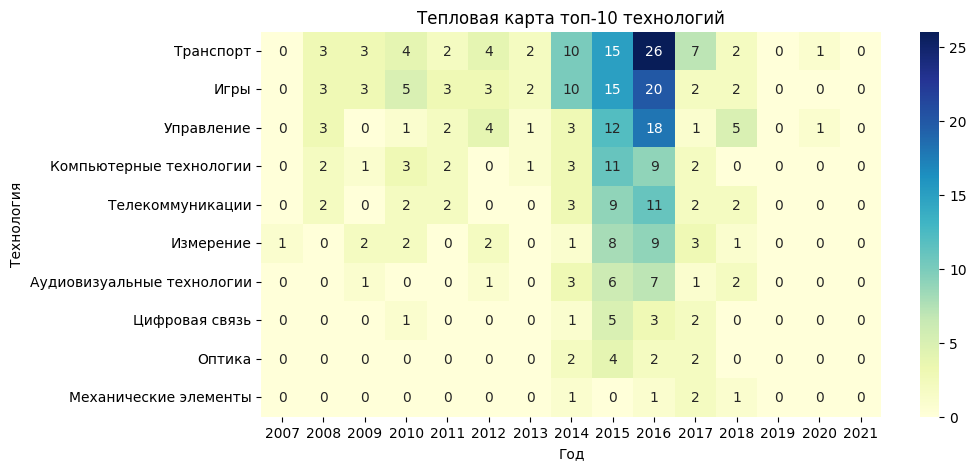

In [254]:
# prompt: show heat map of technology_by_year take top 10 technologies show values of each cell and use seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming technology_by_year DataFrame is already created

# Select the top 10 technologies
top_10_technologies = technology_by_year.sum(axis=1).nlargest(10).index
top_10_technologies
top_10_technology_by_year = technology_by_year.loc[top_10_technologies]

# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(top_10_technology_by_year, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Тепловая карта топ-10 технологий")
plt.xlabel("Год")
plt.ylabel("Технология")
plt.savefig(company_name + "_heat_map_technologies.svg", format="svg")
plt.show()

In [255]:
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    top_10_technology_by_year.to_excel(writer, sheet_name='top_10_technologies')

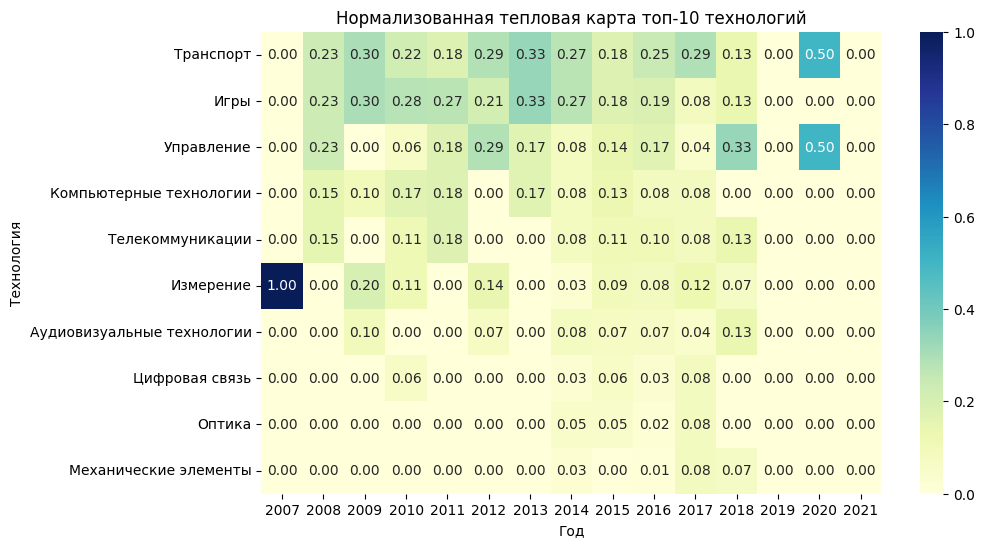

In [256]:
# prompt: show heat map of top_10_technology_by_year normilize each year data using maximum of each year

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_10_technology_by_year DataFrame is already created

# Normalize each year's data
for year in top_10_technology_by_year.columns:
    max_value = top_10_technology_by_year[year].sum()
    if max_value > 0:  # Avoid division by zero if the maximum value is 0
        top_10_technology_by_year[year] = (top_10_technology_by_year[year] / max_value)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_technology_by_year, annot=True, fmt=".2f", cmap="YlGnBu") # Use fmt=".2f" for normalized values
plt.title("Нормализованная тепловая карта топ-10 технологий")
plt.xlabel("Год")
plt.ylabel("Технология")
plt.savefig(company_name + "_heat_map_technologies_normalized.svg", format="svg")
plt.show()

In [257]:
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    top_10_technology_by_year.to_excel(writer, sheet_name='top_10_technologies_normalize')

In [258]:
df_original['IPC - International classification']

,IPC - International classification
0,A63H-027/133\nA63H-027/24\nA63H-030/04\nB64C-0...
1,A63H-027/00\nA63H-027/133\nA63H-027/14\nA63H-0...
2,A63F-013/32\nA63H-027/00\nA63H-030/04\nB64C-01...
3,A63H-027/00\nA63H-027/127\nB64C-013/20\nB64C-0...
4,A63H-027/00\nA63H-027/133\nA63H-030/04\nB64C-0...
...,...
109,G01C-025/00
110,F41H-005/02\nF41H-005/04\nG08C-017/02\nH01Q-00...
111,F16M-011/08
112,G06T-007/13\nG06T-007/223\nG06T-007/246\nG06V-...


In [259]:
tech_ipc = df_original['IPC - International classification']
tech_ipc = df_original['Main IPC']
year = df_original['Priority dates_2']

tech_ipc_year_df = pd.DataFrame({'IPC': tech_ipc, 'Year': year}).dropna()

tech_ipc_year_df['IPC'] = tech_ipc_year_df['IPC'].str.split('\n')
tech_ipc_year_df = tech_ipc_year_df.explode('IPC')


In [260]:
tech_ipc_year_df['IPC'] = tech_ipc_year_df['IPC'].str.replace('-0', '', regex=False).str[:6]


In [261]:
top_ipc = tech_ipc_year_df.IPC.value_counts().index[:10]
top_ipc

Index(['G05D01', 'A63H27', 'B64C39', 'G06T07', 'H04N05', 'B64C27', 'B64C13',
       'A63H30', 'H04N23', 'B64C25'],
      dtype='object', name='IPC')

In [262]:
tech_ipc_year_df = tech_ipc_year_df[tech_ipc_year_df['IPC'].isin(top_ipc)]
tech_ipc_year_df

,IPC,Year
0,B64C13,2008
0,G05D01,2008
0,A63H30,2008
0,A63H27,2008
1,G05D01,2014
...,...,...
106,B64C27,2016
106,B64C39,2016
112,G06T07,2016
112,G06T07,2016


In [263]:
# prompt: ipc_year_counts sort by column values

ipc_year_counts = tech_ipc_year_df.groupby(['Year', 'IPC']).size().unstack(fill_value=0)
ipc_year_counts = ipc_year_counts.sort_values(by=list(ipc_year_counts.columns), ascending=False)


In [264]:
ipc_year_counts = tech_ipc_year_df.groupby('IPC')['Year'].value_counts().unstack(fill_value=0)
for year in years_all:
    if year not in ipc_year_counts.columns:
        ipc_year_counts[year] = 0  # Fill with 0 if the year doesn't exist

# Reorder columns to match years_all
ipc_year_counts = ipc_year_counts[years_all]
ipc_year_counts.sort_index(inplace=True)
ipc_year_counts


Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IPC,,,,,,,,,,,,,,,
A63H27,0,4,5,2,3,3,2,9,4,10,4,1,0,0,0
A63H30,0,2,0,4,2,2,0,2,2,0,0,0,0,0,0
B64C13,0,2,0,4,1,3,0,2,2,0,0,0,0,0,0
B64C25,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0
B64C27,0,0,0,0,0,0,3,6,3,7,0,0,0,0,0
B64C39,0,0,0,0,0,1,1,3,4,7,3,0,0,2,0
G05D01,0,2,0,1,4,11,1,3,12,31,3,4,0,0,0
G06T07,0,0,0,1,0,0,0,2,6,5,6,0,0,0,0
H04N05,0,0,0,0,0,0,0,4,11,4,0,1,0,0,0


In [265]:
# prompt: filter ipc_year_counts to comprise top 10 indexes

# Assuming ipc_year_counts DataFrame is already created

# Select the top 10 IPCs
top_10_ipcs = ipc_year_counts.sum(axis=1).nlargest(10).index
top_10_ipc_year_counts = ipc_year_counts.loc[top_10_ipcs]
top_10_ipc_year_counts

# Now top_10_ipc_year_counts contains only the top 10 IPCs

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IPC,,,,,,,,,,,,,,,
G05D01,0,2,0,1,4,11,1,3,12,31,3,4,0,0,0
A63H27,0,4,5,2,3,3,2,9,4,10,4,1,0,0,0
B64C39,0,0,0,0,0,1,1,3,4,7,3,0,0,2,0
G06T07,0,0,0,1,0,0,0,2,6,5,6,0,0,0,0
H04N05,0,0,0,0,0,0,0,4,11,4,0,1,0,0,0
B64C27,0,0,0,0,0,0,3,6,3,7,0,0,0,0,0
A63H30,0,2,0,4,2,2,0,2,2,0,0,0,0,0,0
B64C13,0,2,0,4,1,3,0,2,2,0,0,0,0,0,0
H04N23,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0


In [266]:
ipc_year_counts = top_10_ipc_year_counts

Text(120.72222222222221, 0.5, 'IPC')

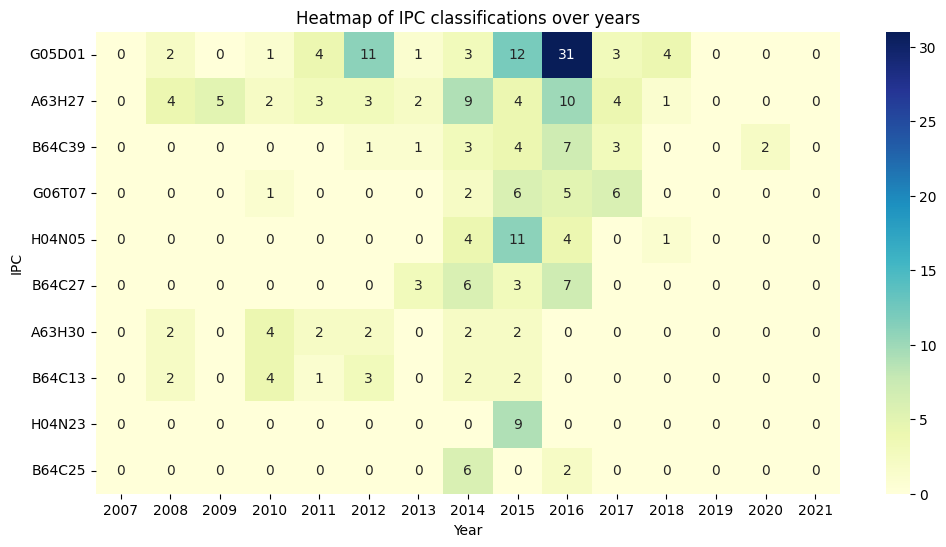

In [267]:
# prompt: make a heat map of ipc_year_counts

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ipc_year_counts DataFrame is already created

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(ipc_year_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of IPC classifications over years")
plt.xlabel("Year")
plt.ylabel("IPC")
#plt.show()

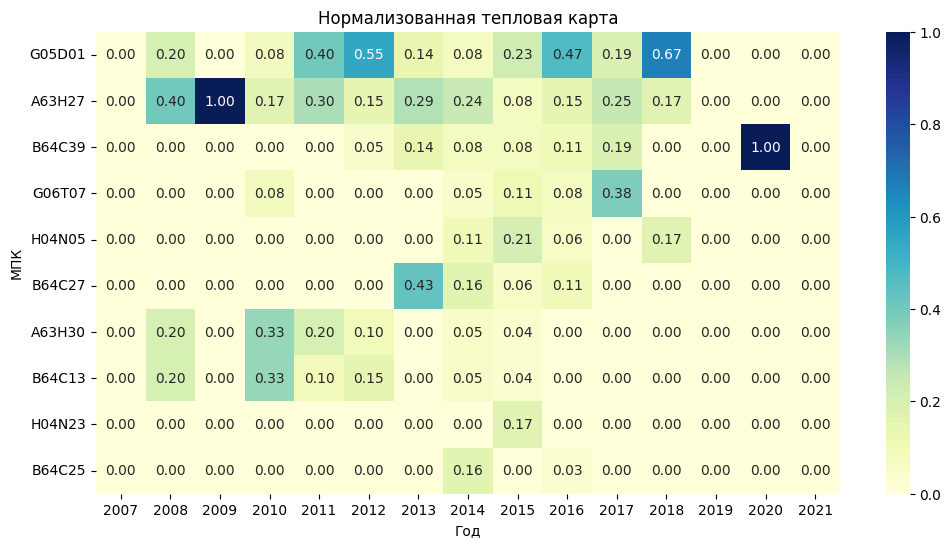

In [268]:
# prompt: show normalized by each years ipc_year_counts

# Assuming ipc_year_counts DataFrame is already created

# Normalize each year's data
ipc_year_counts_normalized = ipc_year_counts.copy()
for year in ipc_year_counts_normalized.columns:
    max_value = ipc_year_counts_normalized[year].sum()
    if max_value > 0:  # Avoid division by zero if the maximum value is 0
        ipc_year_counts_normalized[year] = (ipc_year_counts_normalized[year] / max_value)

# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(ipc_year_counts_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Нормализованная тепловая карта")
plt.xlabel("Год")
plt.ylabel("МПК")
plt.savefig(company_name + "_heat_map_ipc_normalized.svg", format="svg")
plt.show()



In [269]:
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    ipc_year_counts.to_excel(writer, sheet_name='top_10_IPC_normalized')

In [270]:
# prompt: transform a number of 1-4 digits into string representing 4 digit number

def format_number(number):
  """Transforms a number of 1-4 digits into a 4-digit string."""
  number_str = str(number)
  return number_str.zfill(4)


In [271]:
import requests
from bs4 import BeautifulSoup
ipc_texts = []
for i in top_ipc:
  #print(i)
  #print(i[:4], i[4:] )
  #print(str(int(i[4:])*100))

  #break
  url = 'https://allpatents.ru/mpk/' + i[:4] + str(int(i[4:])*100) + '/'
  print(url)
  content = requests.get(url)
  soup = BeautifulSoup(content.text, 'html.parser')
  #print(soup.text)

  ipc_text = soup.find_all('div', class_='container')[3].find('h1').text.strip()
  print(ipc_text.strip())
  if ipc_text != '':
    ipc_texts.append(ipc_text)
  else:
    ipc_texts.append(i)

  #break
print(ipc_texts)

https://allpatents.ru/mpk/G05D100/
МПК G05D 1/00 – Управление или регулирование величин, определяющих местоположение, курс, высоту или положение в пространстве наземных, водных, воздушных или космических транспортных средств, например с помощью автопилотов
https://allpatents.ru/mpk/A63H2700/
МПК A63H 27/00 – Самолеты; прочие игрушечные летательные аппараты
https://allpatents.ru/mpk/B64C3900/
МПК B64C 39/00 – Летательные аппараты, не предусмотренные в других рубриках
https://allpatents.ru/mpk/G06T700/
МПК G06T 7/00 – Анализ изображения, например из побитового к непобитовому изображению
https://allpatents.ru/mpk/H04N500/
МПК H04N 5/00 – Элементы телевизионных систем
https://allpatents.ru/mpk/B64C2700/
МПК B64C 27/00 – Винтокрылые летательные аппараты; несущие винты для них
https://allpatents.ru/mpk/B64C1300/
МПК B64C 13/00 – Системы управления и передачи для приведения в действие поверхностей управления, предкрылков и закрылков, тормозных щитков или интерцепторов
https://allpatents.ru/mp

In [272]:

ipc_mapping = dict(zip(top_ipc, ipc_texts))
ipc_year_counts_for_excel = ipc_year_counts.copy()
# Add a new column 'IPC Text' to the ipc_by_year DataFrame based on the mapping

# Now ipc_by_year DataFrame includes the IPC text descriptions
ipc_year_counts_for_excel.index = ipc_texts
ipc_year_counts_for_excel

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
"МПК G05D 1/00 – Управление или регулирование величин, определяющих местоположение, курс, высоту или положение в пространстве наземных, водных, воздушных или космических транспортных средств, например с помощью автопилотов",0,2,0,1,4,11,1,3,12,31,3,4,0,0,0
МПК A63H 27/00 – Самолеты; прочие игрушечные летательные аппараты,0,4,5,2,3,3,2,9,4,10,4,1,0,0,0
"МПК B64C 39/00 – Летательные аппараты, не предусмотренные в других рубриках",0,0,0,0,0,1,1,3,4,7,3,0,0,2,0
"МПК G06T 7/00 – Анализ изображения, например из побитового к непобитовому изображению",0,0,0,1,0,0,0,2,6,5,6,0,0,0,0
МПК H04N 5/00 – Элементы телевизионных систем,0,0,0,0,0,0,0,4,11,4,0,1,0,0,0
МПК B64C 27/00 – Винтокрылые летательные аппараты; несущие винты для них,0,0,0,0,0,0,3,6,3,7,0,0,0,0,0
"МПК B64C 13/00 – Системы управления и передачи для приведения в действие поверхностей управления, предкрылков и закрылков, тормозных щитков или интерцепторов",0,2,0,4,2,2,0,2,2,0,0,0,0,0,0
"МПК A63H 30/00 – Устройства дистанционного управления, специально предназначенные для игрушек, например для игрушечных транспортных средств",0,2,0,4,1,3,0,2,2,0,0,0,0,0,0
H04N23,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0
МПК B64C 25/00 – Посадочные устройства летательных аппаратов,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0


In [273]:
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer: # Use 'openpyxl' engine for appending
    # Write the technology_by_year DataFrame to a new sheet
    ipc_year_counts_for_excel.to_excel(writer, sheet_name='top_10_IPC_3')

# топ 3 патента

In [274]:
# prompt: find top-50 df_original['Earliest priority number'] which has the biggest value in df_original['All citing patents'], show Earliest priority number and All citing patents number

# Sort the DataFrame by 'All citing patents' in descending order
df_sorted = df_original.sort_values('All citing patents', ascending=False)

# Get the top 50 'Earliest priority number' and their corresponding 'All citing patents'
top_50_citing = df_sorted[['Earliest priority number', 'All citing patents']].head(50)

# Display the result
top_50_citing

,Earliest priority number,All citing patents
10,FR1051751,246
0,FR0806665,177
13,FR1250069,139
40,FR1361061,136
30,FR1250112,134
16,FR1151904,111
24,FR1054945,110
12,FR1252895,100
3,FR1252888,97
6,FR0800768,88


In [275]:
df_sorted = df_original.sort_values('Countries/authorities  - Count', ascending=False)

# Get the top 50 'Earliest priority number' and their corresponding 'All citing patents'
top_50_transision_numbers = df_sorted[['Earliest priority number', 'Countries/authorities  - Count']].head(50)

top_50_transision_numbers

,Earliest priority number,Countries/authorities - Count
0,FR0806665,8
56,FR0806800,7
10,FR1051751,7
24,FR1054945,6
12,FR1252895,6
8,FR0958011,6
9,FR0958013,6
5,FR0954552,6
39,FR1454084,5
53,FR1558421,5


In [276]:
# prompt: find intersection of top_50_citing and top_50_transision_numbers in Earliest priority number column show dataframe comprisng Earliest priority number, Countries/authorities - Count, All citing patents order by Countries/authorities - Count in descending order

# Find the intersection of 'Earliest priority number' in both top_50 dataframes
intersection_priority_numbers = set(top_50_citing['Earliest priority number']).intersection(set(top_50_transision_numbers['Earliest priority number']))
print('intersection_priority_numbers', intersection_priority_numbers)

# Filter the original dataframe to include only the intersecting priority numbers
result_df = df_original[df_original['Earliest priority number'].isin(intersection_priority_numbers)]


# Select the desired columns and sort by 'Countries/authorities - Count'
result_df = result_df[['Earliest priority number', 'Countries/authorities  - Count', 'All citing patents']].sort_values('Countries/authorities  - Count', ascending=False)

# Display the resulting dataframe


intersection_priority_numbers {'FR1552124', 'FR0958011', 'FR1561219', 'FR1361061', 'FR1553656', 'FR0958013', 'FR1252895', 'FR1550568', 'FR1250069', 'FR1558420', 'FR0800768', 'FR0806665', 'FR1250112', 'FR1559927', 'FR1252888', 'FR1463075', 'FR0806800', 'FR1650605', 'FR1553091', 'FR1151904', 'FR1054945', 'FR1457989', 'EM29130040001F', 'FR1454084', 'FR1460876', 'FR1453416', 'FR1057369', 'FR1560735', 'FR1555455', 'FR1456589', 'FR1650839', 'FR1054316', 'FR1461501', 'FR1453712', 'FR1459720', 'FR1051751', 'FR1651563', 'FR1556143', 'FR1155779', 'FR1558421', 'FR1462223'}


In [277]:
# prompt: sort result_df firstly by Countries/authorities - Count column and secondly by All citing patents column both iin descending order

# Sort the result_df first by 'Countries/authorities  - Count' and then by 'All citing patents', both in descending order
result_df = result_df.sort_values(by=['Countries/authorities  - Count', 'All citing patents'], ascending=[False, False])
result_df

,Earliest priority number,Countries/authorities - Count,All citing patents
0,FR0806665,8,177
10,FR1051751,7,246
56,FR0806800,7,61
24,FR1054945,6,110
12,FR1252895,6,100
8,FR0958011,6,75
9,FR0958013,6,45
13,FR1250069,5,139
40,FR1361061,5,136
30,FR1250112,5,134


In [278]:
# выбор патента по максимальному количеству стран перехода и по максимальному количеству цитирований
